In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/advertising.csv')

# Display first few rows
print(df.head())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


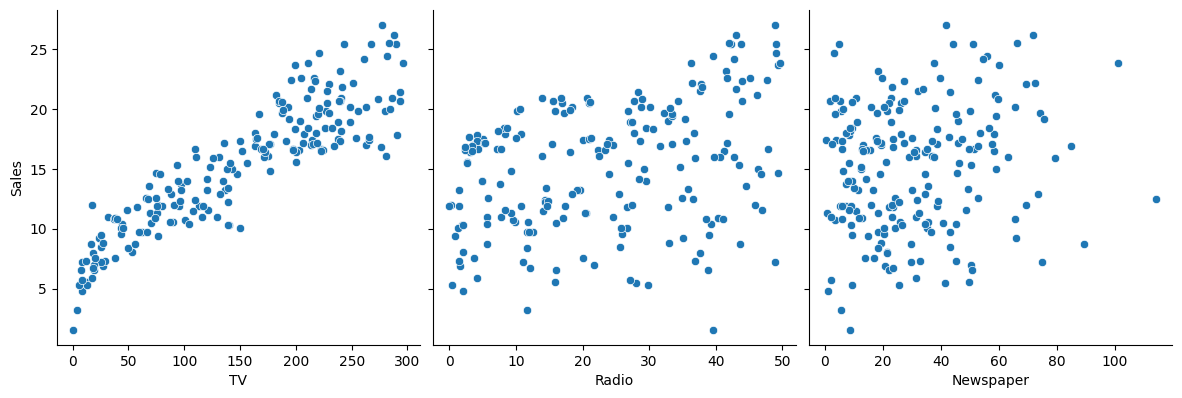

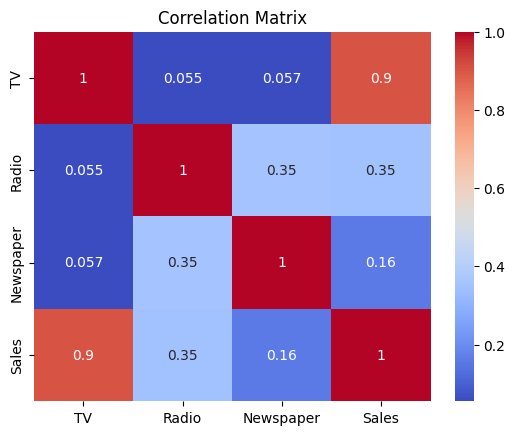

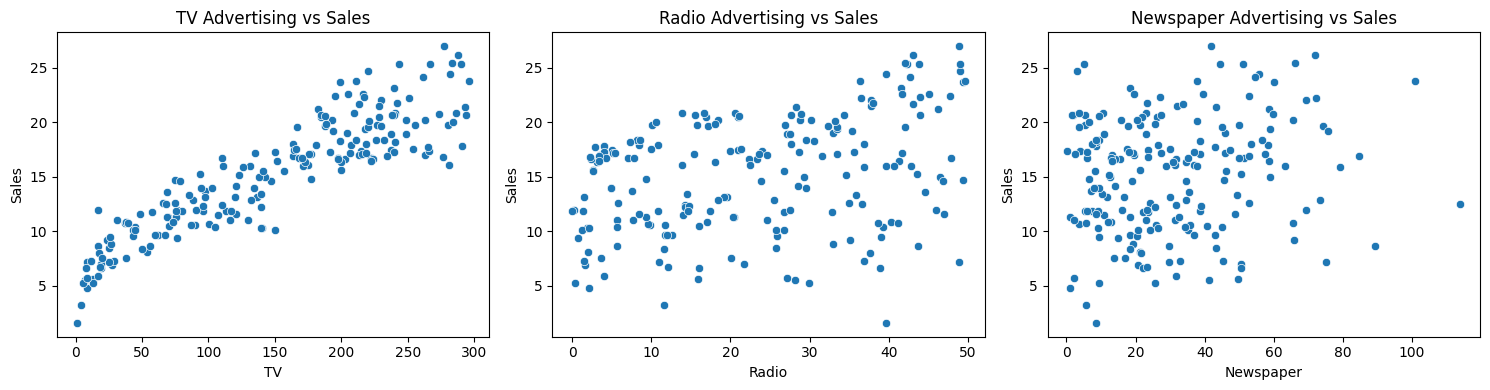

In [10]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Individual plots for each advertising medium
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs Sales')

plt.tight_layout()
plt.show()

In [11]:
# Define features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Intercept: 4.714126402214127
Coefficients:
TV: 0.0545
Radio: 0.1009
Newspaper: 0.0043



Model Performance:
Mean Squared Error: 2.91
Root Mean Squared Error: 1.71
R-squared Score: 0.9059


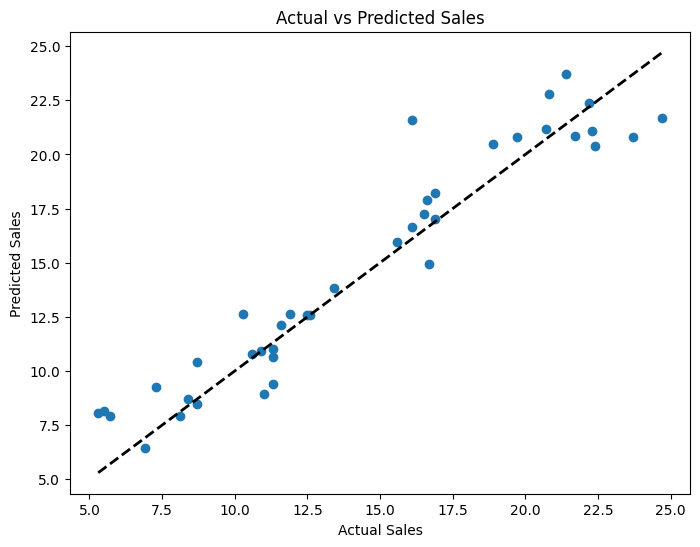

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


Feature Importance:
     Feature  Importance
1      Radio    0.100945
0         TV    0.054509
2  Newspaper    0.004337


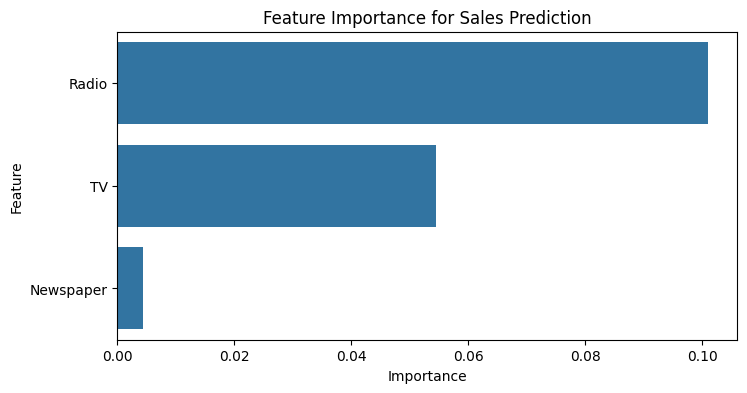

In [14]:
# Calculate feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Sales Prediction')
plt.show()

In [15]:
# Try a model without Newspaper ads
X = df[['TV', 'Radio']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_improved = LinearRegression()
model_improved.fit(X_train, y_train)
y_pred = model_improved.predict(X_test)

r2_improved = r2_score(y_test, y_pred)
print(f"\nR-squared without Newspaper: {r2_improved:.4f}")


R-squared without Newspaper: 0.9079
